### Name: Ahmed Mohiuddin Shah
### CMS ID: 415216
### Section: BSCS-12-A
### Lab: 9

# PreLab

## Importing Libraries

In [61]:
from sklearn.datasets import make_classification, make_moons
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pandas as pd
import seaborn as sns
import numpy as np

## Generate Data

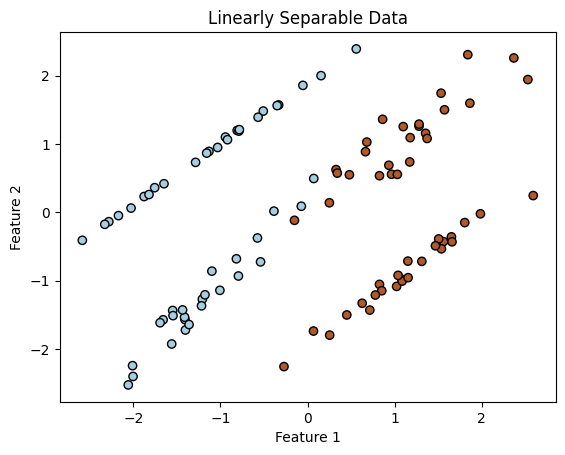

In [62]:
# Generate data
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# Plot data
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Data')
plt.show()

## Training SVM (SVC)

In [63]:
# Train the SVM
model = SVC(kernel='linear', C=1)
model.fit(X, y)

# Extract the hyperplane parameters
w = model.coef_[0]
b = model.intercept_[0]

## Visualizing The Decision Boundary

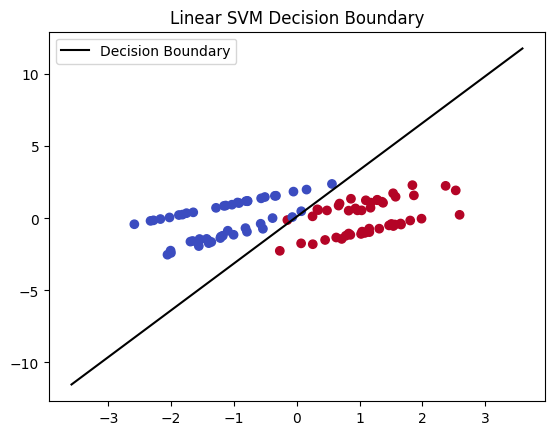

In [64]:
#  Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
xx = np.linspace(x_min, x_max, 100)
yy = -(w[0] * xx + b) / w[1]  # Equation of hyperplane
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm")
plt.plot(xx, yy, "k-", label="Decision Boundary")
plt.legend()
plt.title("Linear SVM Decision Boundary")
plt.show()

## Kernels

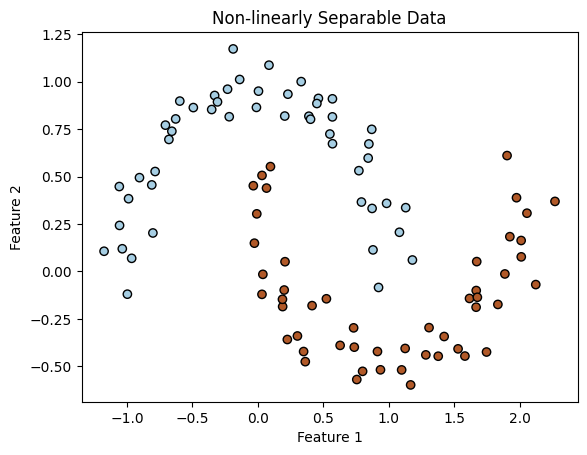

In [65]:
# Generate data
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Non-linearly Separable Data')
plt.show()

## Trianing SVM with RBF Kernel

uses rbf as default kernel

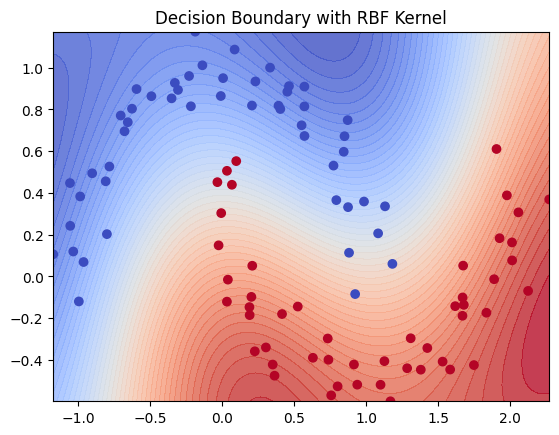

In [66]:
# Train SVM with RBF Kernel
model = SVC(kernel="rbf", C=1, gamma=0.5)
model.fit(X, y)
# Visualize decision boundary
import numpy as np

xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max(), 200),
    np.linspace(X[:, 1].min(), X[:, 1].max(), 200),
)
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(
    xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 50), cmap="coolwarm", alpha=0.8
)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm")
plt.title("Decision Boundary with RBF Kernel")
plt.show()

## Hyperparameter tuning with GridSearchCV

In [67]:
# Define parameter grid 
param_grid = { 
'C': [0.1, 1, 10], 
'gamma': [0.1, 0.5, 1], 
'kernel': ['rbf'] 
} 
# Initialize GridSearch 
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy') 
grid_search.fit(X, y) 
# Best parameters 
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


## Visualizing Hyperparameter Tuning

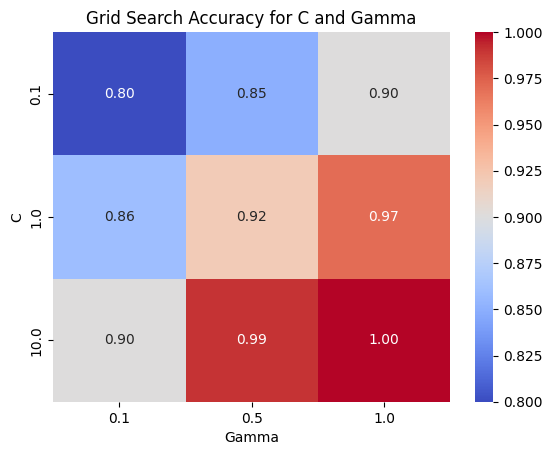

In [68]:
# Example results (from grid_search.cv_results_) 
results = pd.DataFrame(grid_search.cv_results_) 
pivot_table = results.pivot(index='param_C', values='mean_test_score', columns='param_gamma') 
# Heatmap 
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".2f") 
plt.title("Grid Search Accuracy for C and Gamma") 
plt.xlabel("Gamma") 
plt.ylabel("C") 
plt.show()

## Random Search – A Faster Alternative 

In [69]:
random_search = RandomizedSearchCV(
    SVC(), param_grid, n_iter=10, cv=5, scoring="accuracy", random_state=42
)
random_search.fit(X, y)
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'kernel': 'rbf', 'gamma': 1, 'C': 10}


c:\Users\Ahmed Mohiuddin Shah\Documents\Machine Learning\.conda\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


## Visualing the Linear Decision Boundary

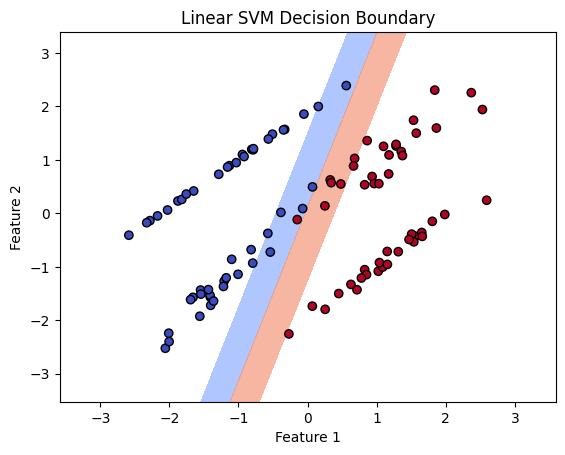

In [70]:
# Generate synthetic data
X, y = make_classification(
    n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42
)
# Train an SVM
model = SVC(kernel="linear", C=1)
model.fit(X, y)
# Create a grid to plot decision boundary
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
    np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100),
)
# Predict values for the grid
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot decision boundary
plt.contourf(
    xx,
    yy,
    Z,
    levels=[-1, 0, 1],
    alpha=0.7,
    cmap="coolwarm",
    linestyles=["--", "-", "--"],
)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap="coolwarm")
plt.title("Linear SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Visualizing Non-Linear Decision Boundaries 

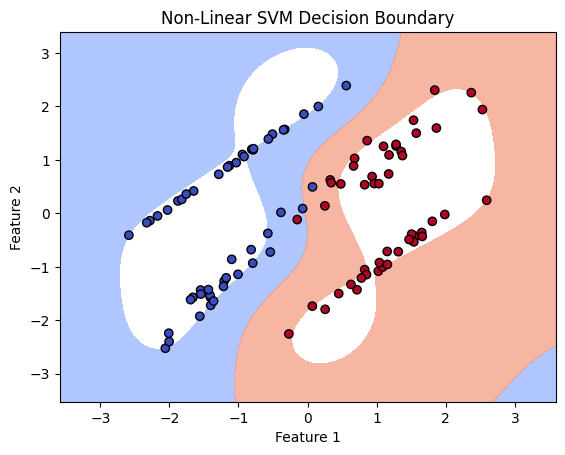

In [71]:
# Train an SVM with RBF kernel
model_rbf = SVC(kernel="rbf", C=1, gamma=0.5)
model_rbf.fit(X, y)
# Predict values for the grid
Z_rbf = model_rbf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)
# Plot decision boundary
plt.contourf(
    xx,
    yy,
    Z_rbf,
    levels=[-1, 0, 1],
    alpha=0.7,
    cmap="coolwarm",
    linestyles=["--", "-", "--"],
)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap="coolwarm")
plt.title("Non-Linear SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Mini Challenge

## Importing Libraries

In [72]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

## Loading Data

In [73]:
# fetch dataset
banknote_authentication = fetch_ucirepo(id=267)

# data (as pandas dataframes)
X = banknote_authentication.data.features
y = banknote_authentication.data.targets

# metadata
print(banknote_authentication.metadata)

# variable information
print(banknote_authentication.variables)

{'uci_id': 267, 'name': 'Banknote Authentication', 'repository_url': 'https://archive.ics.uci.edu/dataset/267/banknote+authentication', 'data_url': 'https://archive.ics.uci.edu/static/public/267/data.csv', 'abstract': 'Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1372, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.24432/C55P57', 'creators': ['Volker Lohweg'], 'intro_paper': None, 'additional_info': {'summary': 'Data were extracted from images that were taken from genuine and forged banknote-like specimens.  For digitization, an industrial camera usually used for print inspection was used. The final im

## Cleaning The Data

In [74]:
# CLeaning data
# Check for missing values

print("Checking null:", X.isnull().sum())

# Check for duplicates
print("Checking duplicates:", X.duplicated().sum())

# Check for class imbalance
print("Checking class imbalance:", y.value_counts())

Checking null: variance    0
skewness    0
curtosis    0
entropy     0
dtype: int64
Checking duplicates: 24
Checking class imbalance: class
0        762
1        610
Name: count, dtype: int64


## Exploring Data

### Correlation Matrix

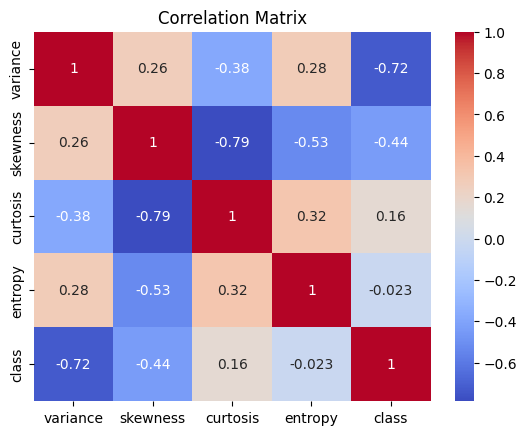

In [75]:
# Compute the correlation matrix
banknote_data = pd.concat([X, y], axis=1)
correlation_matrix = banknote_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Making Pair plot

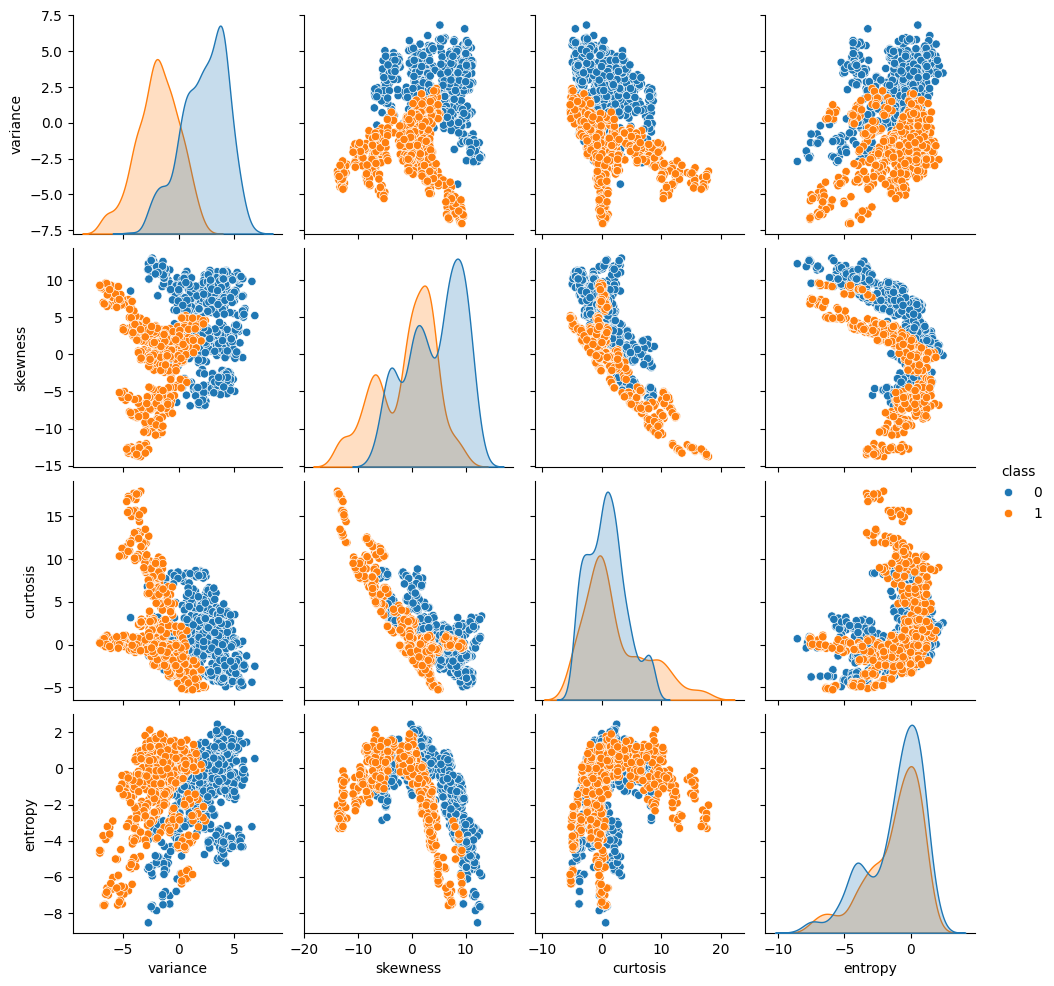

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64


In [76]:
# Visualize the distribution of each feature
sns.pairplot(banknote_data, hue="class")
plt.show()
# Check for missing values
print(banknote_data.isnull().sum())

## Normalizing and Standarizing Data

In [77]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Making Train Test Split

In [78]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Training SVM

In [79]:
# Train an SVM with RBF kernel
svm_model = SVC(kernel="rbf", random_state=42, probability=True, class_weight="balanced", C=0.1, gamma=0.1)
svm_model.fit(X_train, y_train)

c:\Users\Ahmed Mohiuddin Shah\Documents\Machine Learning\.conda\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, class_weight='balanced', gamma=0.1, probability=True,
    random_state=42)

## Evaluate the model

In [80]:
# Evaluate the model
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9854545454545455
Precision: 0.9694656488549618
Recall: 1.0
F1-Score: 0.9844961240310077

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       148
           1       0.97      1.00      0.98       127

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



## PCA for visualization

In [81]:
# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca = train_test_split(
    X_pca, test_size=0.2, random_state=42, stratify=y
)

# Fit SVM on PCA-reduced data
svm_pca_model = SVC(kernel="rbf", random_state=42, C=0.1, gamma=0.1)
svm_pca_model.fit(X_train_pca, y_train)

c:\Users\Ahmed Mohiuddin Shah\Documents\Machine Learning\.conda\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, gamma=0.1, random_state=42)

## Decision Boundary Visualization

### Function For Plotting Decision Boundary

In [82]:
def plot_decision_boundary(X, y, model, title):
    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min(), X[:, 0].max(), 200),
        np.linspace(X[:, 1].min(), X[:, 1].max(), 200),
    )
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(
        xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 50), cmap="coolwarm", alpha=0.8
    )
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm")
    plt.title("Decision Boundary with RBF Kernel")
    plt.show()

### Plotting Decision Boundary

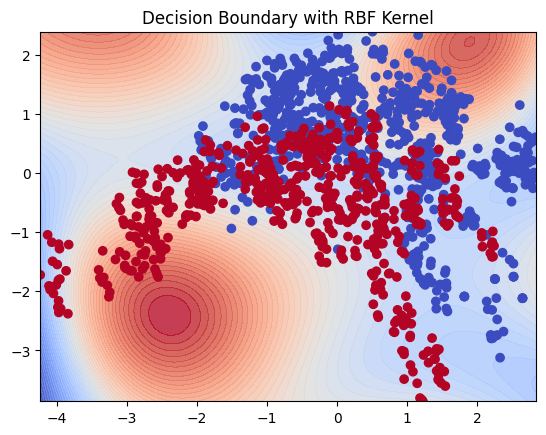

In [83]:
plot_decision_boundary(X_pca, y.values.ravel(), svm_pca_model, "SVM Decision Boundary on PCA-reduced Data")


## HyperParameter Tuning with GridSearchCV

In [84]:
# Hyperparameter tuning with GridSearchCV
param_grid = {"C": [0.1, 1, 10, 100], "gamma": [1, 0.1, 0.01, 0.001]}
grid = GridSearchCV(SVC(kernel="rbf"), param_grid, refit=True, cv=5, scoring="accuracy")
grid.fit(X_train, y_train.values.ravel())

# Best parameters and performance
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'C': 10, 'gamma': 0.1}
Best Score: 1.0


## Heatmap of accuracy scores

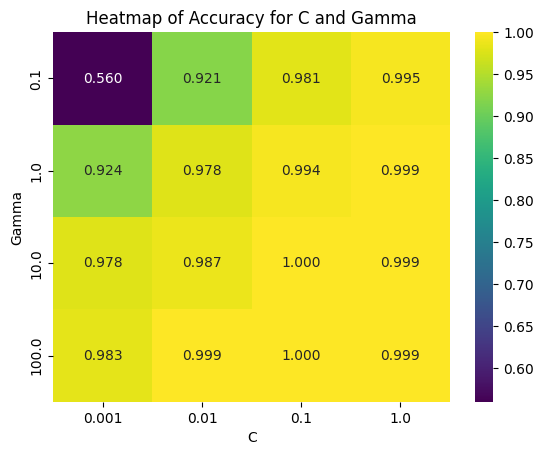

In [85]:
results = pd.DataFrame(grid.cv_results_)
heatmap_data = results.pivot(index="param_C", columns="param_gamma", values="mean_test_score")
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="viridis")
plt.title("Heatmap of Accuracy for C and Gamma")
plt.xlabel("C")
plt.ylabel("Gamma")
plt.show()

# Conclusion

In this lab, we successfully classified banknotes as genuine or forged using an SVM with an RBF kernel. After scaling the data and visualizing feature distributions, we trained and evaluated the model, achieving high performance with balanced precision, recall, and F1-scores. PCA was applied for visualization, and GridSearchCV optimized the hyperparameters, further enhancing accuracy. This lab demonstrated the importance of preprocessing, evaluation, and tuning in building effective machine learning models.